# Import 

In [34]:
import pandas as pd 
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
df_powers = pd.read_csv(r"K:\coding_DOJO\superhero_powers - superhero_powers.csv")

df_powers

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."
...,...,...
662,Yellowjacket II,"Flight,Energy Blasts,Size Changing"
663,Ymir,"Cold Resistance,Durability,Longevity,Super Str..."
664,Yoda,"Agility,Stealth,Danger Sense,Marksmanship,Weap..."
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba..."


In [3]:
df_info= pd.read_csv(r"K:\coding_DOJO\superhero_info - superhero_info.csv")

df_info

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"
...,...,...,...,...,...,...,...,...
458,Yellowjacket|Marvel Comics,Male,Human,good,Blond,blue,Unknown,"{'Height': '183.0 cm', 'Weight': '83.0 kg'}"
459,Yellowjacket II|Marvel Comics,Female,Human,good,Strawberry Blond,blue,Unknown,"{'Height': '165.0 cm', 'Weight': '52.0 kg'}"
460,Yoda|George Lucas,Male,Yoda's species,good,White,brown,green,"{'Height': '66.0 cm', 'Weight': '17.0 kg'}"
461,Zatanna|DC Comics,Female,Human,good,Black,blue,Unknown,"{'Height': '170.0 cm', 'Weight': '57.0 kg'}"


# Clean 

In [4]:
# check missing values
df_info.isna().sum().sum()

0

In [5]:
df_powers.isna().sum().sum()

0

In [6]:
# check duplicates
df_info.duplicated().sum()

0

In [7]:
df_powers.duplicated().sum()

0

# Split Hero|Publisher column

In [8]:
## Split Hero|Publisher in df_info
df_info[['Hero','Publisher']] = df_info['Hero|Publisher'].str.split('|',expand=True)
df_info.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [9]:
# drop 'Hero|Publisher' column
df_info = df_info.drop(columns='Hero|Publisher')
df_info

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics
...,...,...,...,...,...,...,...,...,...
458,Male,Human,good,Blond,blue,Unknown,"{'Height': '183.0 cm', 'Weight': '83.0 kg'}",Yellowjacket,Marvel Comics
459,Female,Human,good,Strawberry Blond,blue,Unknown,"{'Height': '165.0 cm', 'Weight': '52.0 kg'}",Yellowjacket II,Marvel Comics
460,Male,Yoda's species,good,White,brown,green,"{'Height': '66.0 cm', 'Weight': '17.0 kg'}",Yoda,George Lucas
461,Female,Human,good,Black,blue,Unknown,"{'Height': '170.0 cm', 'Weight': '57.0 kg'}",Zatanna,DC Comics


# Extract height and weight column

In [10]:
# first let's create a test before use in the all column: 
test_w_h = df_info.loc[0, 'Measurements']
print(test_w_h)
print(type(test_w_h))

{'Height': '203.0 cm', 'Weight': '441.0 kg'}
<class 'str'>


### replace (') to (") and convert str to dict with json.loads

In [11]:
# to use json.loads and convert str to dic first we need replace ' to "
test_w_h = test_w_h.replace("'",'"')
test_w_h



'{"Height": "203.0 cm", "Weight": "441.0 kg"}'

In [12]:
# transform str to dict wiht json.loads
fixed_w_h = json.loads(test_w_h)
print(type(fixed_w_h))
fixed_w_h

<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [13]:
# ok! worked in my test, let's applying this to the entire column
# replace all single quotes
df_info['Measurements'] = df_info['Measurements'].str.replace("'",'"')
# apply json.loads
df_info['Measurements'] = df_info['Measurements'].apply(json.loads)
df_info['Measurements']

0      {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1       {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2       {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3      {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4      {'Height': '193.0 cm', 'Weight': '122.0 kg'}
                           ...                     
458     {'Height': '183.0 cm', 'Weight': '83.0 kg'}
459     {'Height': '165.0 cm', 'Weight': '52.0 kg'}
460      {'Height': '66.0 cm', 'Weight': '17.0 kg'}
461     {'Height': '170.0 cm', 'Weight': '57.0 kg'}
462     {'Height': '185.0 cm', 'Weight': '81.0 kg'}
Name: Measurements, Length: 463, dtype: object

### unpack dict into separete columns


In [14]:
w_h = df_info['Measurements'].apply(pd.Series)
w_h


,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [15]:
### concat new columns height and weight to df_info

df_info = pd.concat((df_info, w_h), axis = 1)
df_info

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics,185.0 cm,90.0 kg
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics,203.0 cm,441.0 kg
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics,193.0 cm,122.0 kg
...,...,...,...,...,...,...,...,...,...,...,...
458,Male,Human,good,Blond,blue,Unknown,"{'Height': '183.0 cm', 'Weight': '83.0 kg'}",Yellowjacket,Marvel Comics,183.0 cm,83.0 kg
459,Female,Human,good,Strawberry Blond,blue,Unknown,"{'Height': '165.0 cm', 'Weight': '52.0 kg'}",Yellowjacket II,Marvel Comics,165.0 cm,52.0 kg
460,Male,Yoda's species,good,White,brown,green,"{'Height': '66.0 cm', 'Weight': '17.0 kg'}",Yoda,George Lucas,66.0 cm,17.0 kg
461,Female,Human,good,Black,blue,Unknown,"{'Height': '170.0 cm', 'Weight': '57.0 kg'}",Zatanna,DC Comics,170.0 cm,57.0 kg


In [16]:
# drop Measurements column
df_info = df_info.drop(columns='Measurements')
df_info

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0 cm,90.0 kg
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0 cm,441.0 kg
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0 cm,122.0 kg
...,...,...,...,...,...,...,...,...,...,...
458,Male,Human,good,Blond,blue,Unknown,Yellowjacket,Marvel Comics,183.0 cm,83.0 kg
459,Female,Human,good,Strawberry Blond,blue,Unknown,Yellowjacket II,Marvel Comics,165.0 cm,52.0 kg
460,Male,Yoda's species,good,White,brown,green,Yoda,George Lucas,66.0 cm,17.0 kg
461,Female,Human,good,Black,blue,Unknown,Zatanna,DC Comics,170.0 cm,57.0 kg


In [17]:
# to remove cm and kg we need split str and keep the first [0]
df_info['Height'] = df_info['Height'].str.split().str[0]
df_info['Weight'] = df_info['Weight'].str.split().str[0]
df_info

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0
...,...,...,...,...,...,...,...,...,...,...
458,Male,Human,good,Blond,blue,Unknown,Yellowjacket,Marvel Comics,183.0,83.0
459,Female,Human,good,Strawberry Blond,blue,Unknown,Yellowjacket II,Marvel Comics,165.0,52.0
460,Male,Yoda's species,good,White,brown,green,Yoda,George Lucas,66.0,17.0
461,Female,Human,good,Black,blue,Unknown,Zatanna,DC Comics,170.0,57.0


In [18]:
# transform to float columns 
df_info['Height'] = df_info['Height'].astype(float)
df_info['Weight'] = df_info['Weight'].astype(float)

In [19]:
# check dtype
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      463 non-null    object 
 1   Race        463 non-null    object 
 2   Alignment   463 non-null    object 
 3   Hair color  463 non-null    object 
 4   Eye color   463 non-null    object 
 5   Skin color  463 non-null    object 
 6   Hero        463 non-null    object 
 7   Publisher   463 non-null    object 
 8   Height      463 non-null    float64
 9   Weight      463 non-null    float64
dtypes: float64(2), object(8)
memory usage: 36.3+ KB


In [20]:
df_info

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0
...,...,...,...,...,...,...,...,...,...,...
458,Male,Human,good,Blond,blue,Unknown,Yellowjacket,Marvel Comics,183.0,83.0
459,Female,Human,good,Strawberry Blond,blue,Unknown,Yellowjacket II,Marvel Comics,165.0,52.0
460,Male,Yoda's species,good,White,brown,green,Yoda,George Lucas,66.0,17.0
461,Female,Human,good,Black,blue,Unknown,Zatanna,DC Comics,170.0,57.0


# Convert a column of lists into one-hot-encoded columns (a column for each item in the list)


In [21]:
# first we need to get every power.unique that appears in the dataset

df_powers


,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."
...,...,...
662,Yellowjacket II,"Flight,Energy Blasts,Size Changing"
663,Ymir,"Cold Resistance,Durability,Longevity,Super Str..."
664,Yoda,"Agility,Stealth,Danger Sense,Marksmanship,Weap..."
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba..."


In [22]:
print(df_powers.loc[2,'Powers'])
print(type(df_powers.loc[2,'Powers']))

Agility,Accelerated Healing,Cold Resistance,Durability,Underwater breathing,Marksmanship,Weapons Master,Longevity,Intelligence,Super Strength,Telepathy,Stamina,Immortality,Reflexes,Enhanced Sight,Sub-Mariner
<class 'str'>


In [23]:
# there is no white space we need split power in , than we going to have a list
powers = df_powers['Powers'].str.split(",")
powers

0        [Agility, Super Strength, Stamina, Super Speed]
1      [Accelerated Healing, Durability, Longevity, S...
2      [Agility, Accelerated Healing, Cold Resistance...
3                                   [Lantern Power Ring]
4      [Accelerated Healing, Intelligence, Super Stre...
                             ...                        
662               [Flight, Energy Blasts, Size Changing]
663    [Cold Resistance, Durability, Longevity, Super...
664    [Agility, Stealth, Danger Sense, Marksmanship,...
665    [Cryokinesis, Telepathy, Magic, Fire Control, ...
666    [Super Speed, Intangibility, Time Travel, Time...
Name: Powers, Length: 667, dtype: object

In [24]:
## exploding the column of lists
exploded = powers.explode('Powers')
exploded



0                   Agility
1            Super Strength
2                   Stamina
3               Super Speed
4       Accelerated Healing
               ...         
5869        Weather Control
5870            Super Speed
5871          Intangibility
5872            Time Travel
5873      Time Manipulation
Name: Powers, Length: 5874, dtype: object

In [26]:
## saving the unique values from the exploded column
cols_to_make = exploded.dropna().unique()
cols_to_make



array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [30]:
for col in cols_to_make:
    df_powers[col] = df_powers['Powers'].str.contains(col)
df_powers



,hero_names,Powers,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",False,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...",True,True,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...",False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,"Flight,Energy Blasts,Size Changing",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,"Cold Resistance,Durability,Longevity,Super Str...",False,True,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,"Agility,Stealth,Danger Sense,Marksmanship,Weap...",True,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba...",False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


# Merge dataframes 

In [29]:
## merging with different column names
merged_df = pd.merge(df_info, df_powers, left_on='Hero', right_on='hero_names')
merged_df


,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Male,Human,good,Blond,blue,Unknown,Yellowjacket,Marvel Comics,183.0,83.0,...,False,False,False,False,False,False,False,False,False,False
459,Female,Human,good,Strawberry Blond,blue,Unknown,Yellowjacket II,Marvel Comics,165.0,52.0,...,False,False,False,False,False,False,False,False,False,False
460,Male,Yoda's species,good,White,brown,green,Yoda,George Lucas,66.0,17.0,...,False,False,False,False,False,False,False,False,False,False
461,Female,Human,good,Black,blue,Unknown,Zatanna,DC Comics,170.0,57.0,...,True,False,False,False,False,False,False,False,False,False


# 1 - Compare the average weight of super powers who have Super Speed to those who do not.

In [31]:
merged_df_1 = merged_df.groupby('Super Speed')['Weight'].mean()
merged_df_1

Super Speed
False    101.773585
True     129.404040
Name: Weight, dtype: float64

Super heroes with super speed are heavier than super heroes who don't have super speed. 

# 2 - What is the average height of heroes for each publisher?

In [32]:
merged_df_2 = merged_df.groupby('Publisher')['Height'].mean()
merged_df_2

Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height, dtype: float64

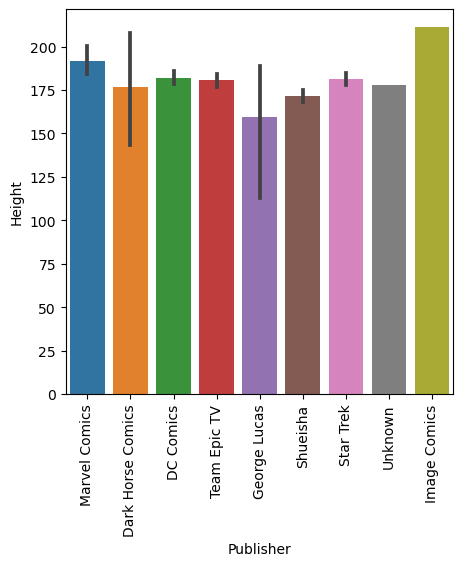

In [38]:
plt.figure(figsize=(5,5))

sns.barplot(data=merged_df, x='Publisher', y='Height')
plt.xticks(rotation = 90)
plt.show()